In [1]:
import numpy as np                                                                                                                                                                                          # type: ignore
import pandas as pd                                                                                                                                                                                         # type: ignore
import warnings                                                                                                                                                                                               # type: ignore
import matplotlib.pyplot as plt                                                                                                                                                                            # type: ignore
import seaborn as sns                                                                                                                                                                                       # type: ignore
import re 
import nltk                                                                                                                                                                                                                # type: ignore
from nltk.corpus import stopwords                                                                                                                                                                                 # type: ignore
from nltk.stem.porter import PorterStemmer                                                                                                                                                                    # type: ignore
from nltk.stem import WordNetLemmatizer                                                                                                                                                                         # type: ignore
from sklearn.feature_extraction.text import TfidfVectorizer                                                                                                                                                    # type: ignore
from sklearn.preprocessing import LabelEncoder                                                                                                                                                                  # type: ignore
from sklearn.model_selection import train_test_split                                                                                                                                                          # type: ignore
from sklearn.pipeline import Pipeline                                                                                                                                                                                  # type: ignore
from sklearn.naive_bayes import MultinomialNB                                                                                                                                                                 # type: ignore
from sklearn.ensemble import RandomForestClassifier                                                                                                                                                        # type: ignore
from sklearn.neighbors import KNeighborsClassifier                                                                                                                                                         # type: ignore
from sklearn.svm import SVC                                                                                                                                                                                # type: ignore
from sklearn.model_selection import cross_val_score                                                                                                                                                         # type: ignore
from matplotlib.colors import ListedColormap                                                                                                                                                               # type: ignore
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score                                                                                                  # type: ignore
from sklearn import metrics                                                                                                                                                                                # type: ignore
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
     for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spamdata/spam.csv


In [2]:
df=pd.read_csv('/kaggle/input/spamdata/spam.csv', encoding='ISO-8859-1') # read the data with encoding since there are special or latin characters 
df.head(20) # check head 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df=df.iloc[:,[0,1]] # drop the last two na columns which are not useful for our task too
df.head(10)
df.columns = ['Spam or Ham','Text'] # rename columns 
df.head()

,Spam or Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df. describe()

,Spam or Ham,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Spam or Ham  5572 non-null   object
 1   Text         5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


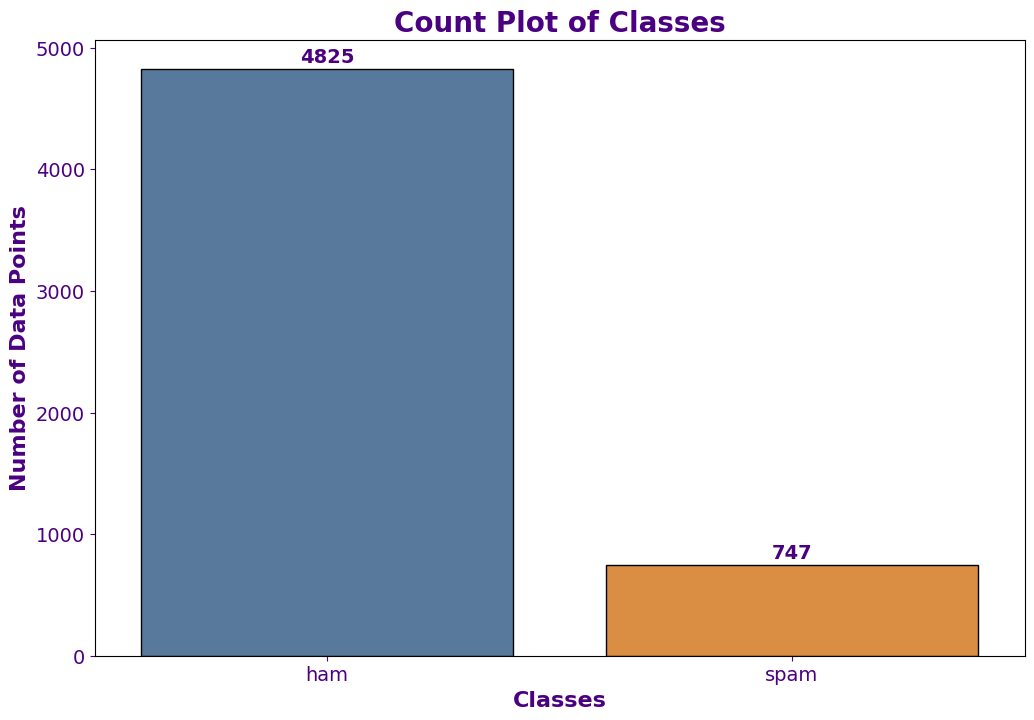

In [6]:
cols = ["#4E79A7", "#F28E2B"]  # Blue and orange colors

# Evaluate the target and find out if our data is balanced
plt.figure(figsize=(12, 8))

# Create the count plot 
fg = sns.countplot(x=df["Spam or Ham"], palette=cols, edgecolor="black")

# Set the title and labels 
fg.set_title("Count Plot of Classes", color="#4B0082", fontsize=20, fontweight='bold')
fg.set_xlabel("Classes", color="#4B0082", fontsize=16, fontweight='bold')
fg.set_ylabel("Number of Data Points", color="#4B0082", fontsize=16, fontweight='bold')

# Customize the tick parameters for better readability
fg.tick_params(axis='x', colors='#4B0082', labelsize=14)
fg.tick_params(axis='y', colors='#4B0082', labelsize=14)

# Add value labels on the bars
for p in fg.patches:
    fg.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                color="#4B0082", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

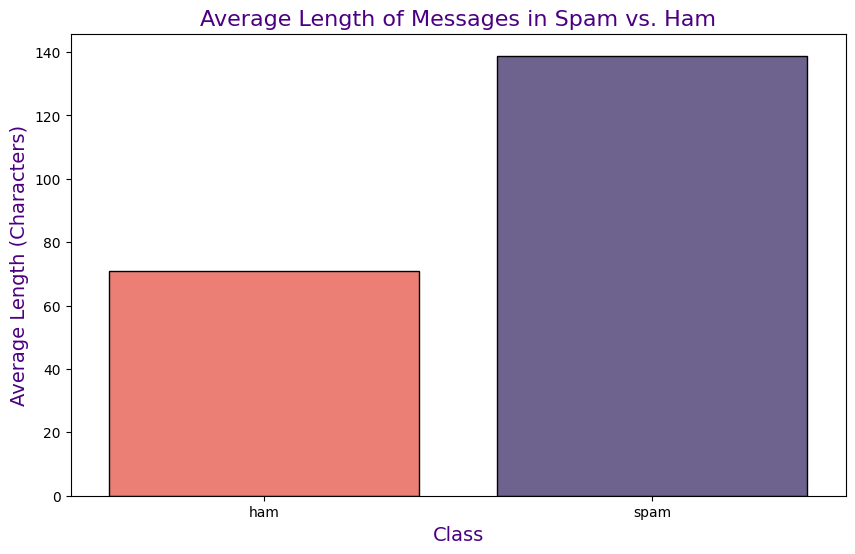

In [7]:
palette = ["#FF6F61", "#6B5B95"]

# Add a column for the length of the text
df['Text_Length'] = df['Text'].apply(len)

# Calculate the average length of messages per class
average_length = df.groupby('Spam or Ham')['Text_Length'].mean().reset_index()

# Plot the average length of messages
plt.figure(figsize=(10, 6))
sns.barplot(x='Spam or Ham', y='Text_Length', data=average_length, palette=palette, edgecolor='black')
plt.title('Average Length of Messages in Spam vs. Ham', fontsize=16, color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Average Length (Characters)', fontsize=14, color='#4B0082')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

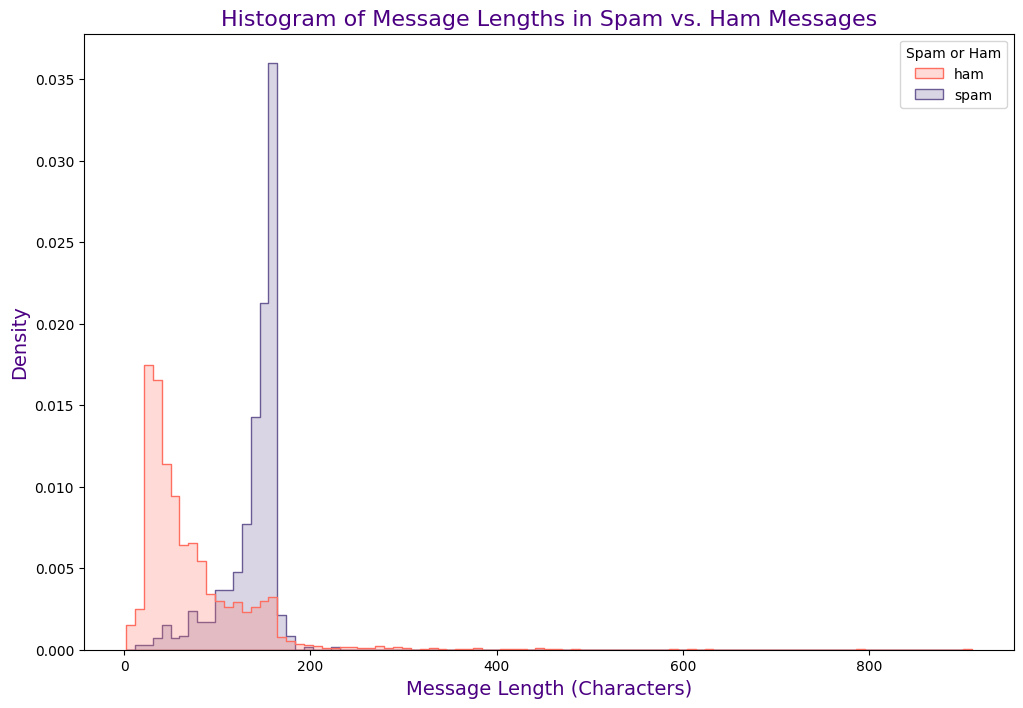

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Text_Length', hue='Spam or Ham', palette=palette, element='step', stat='density', common_norm=False)
plt.title('Histogram of Message Lengths in Spam vs. Ham Messages', fontsize=16, color='#4B0082')
plt.xlabel('Message Length (Characters)', fontsize=14, color='#4B0082')
plt.ylabel('Density', fontsize=14, color='#4B0082')
plt.show()

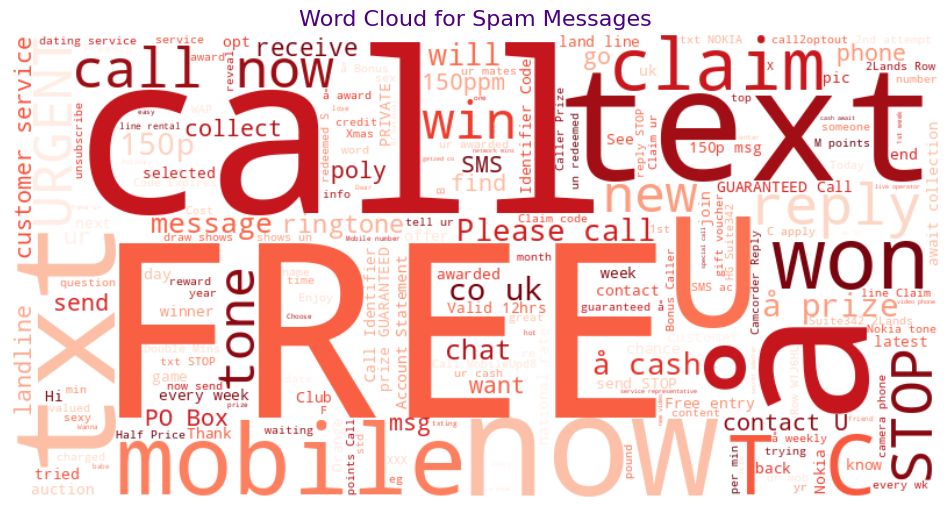

In [9]:
from wordcloud import WordCloud                                                                                                                                                                                # type: ignore

# Filter spam messages
spam_texts = ' '.join(df[df['Spam or Ham'] == 'spam']['Text'])

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#4B0082')
plt.show()

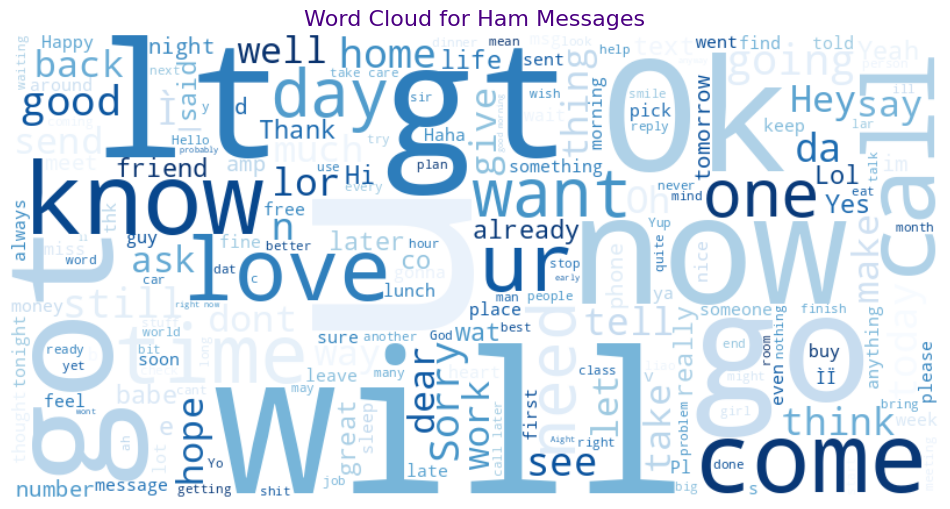

In [10]:
ham_texts = ' '.join(df[df['Spam or Ham'] == 'ham']['Text'])

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages', fontsize=16, color='#4B0082')
plt.show()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


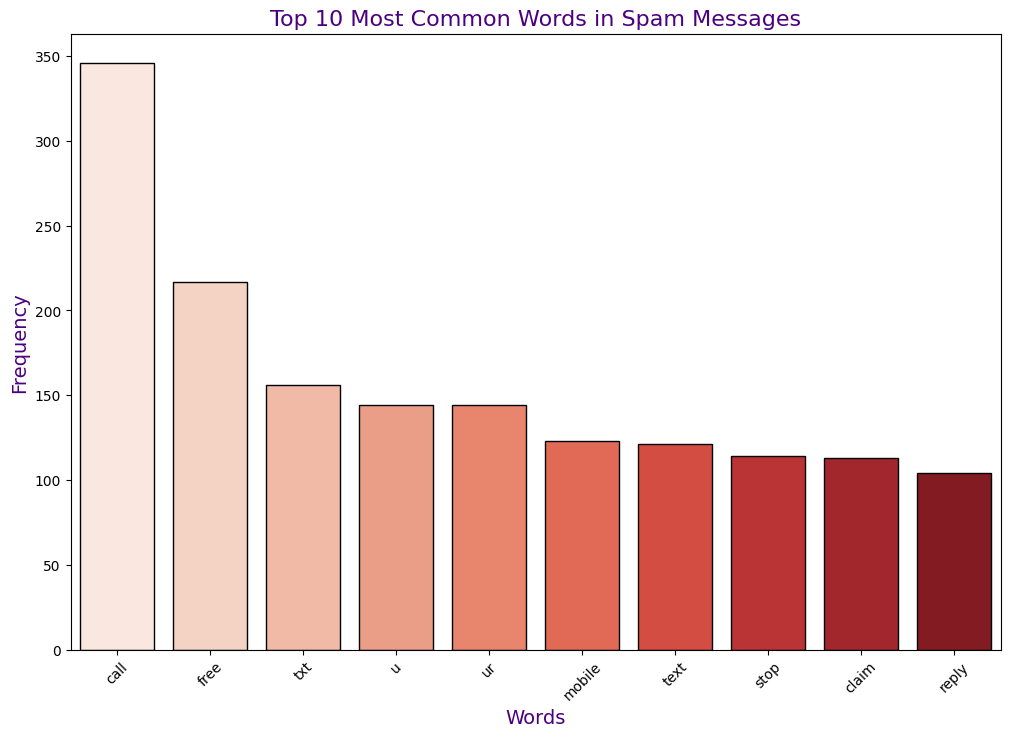

In [11]:
from collections import Counter
import nltk                                                                                                                                                                                                         # type: ignore
nltk.download('stopwords')
from nltk.corpus import stopwords                                                                                                                                                                            # type: ignore

# Filter spam messages and tokenize
spam_words = ' '.join(df[df['Spam or Ham'] == 'spam']['Text'])
spam_tokens = nltk.word_tokenize(spam_words)

# Remove stop words and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in spam_tokens if word.isalpha() and word.lower() not in stop_words]
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

# Plot the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x=list(words), y=list(counts), palette='Reds', edgecolor='black')
plt.title('Top 10 Most Common Words in Spam Messages', fontsize=16, color='#4B0082')
plt.xlabel('Words', fontsize=14, color='#4B0082')
plt.ylabel('Frequency', fontsize=14, color='#4B0082')
plt.xticks(rotation=45)
plt.show()